In [105]:
import warnings
warnings.filterwarnings("ignore")

In [107]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

In [108]:
# load the data
ds = pd.read_csv("../Oracle/Mall_Customers.csv")

In [109]:
# Displaying few rows of the data
ds

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [110]:
# Select relevant features for clustering
ds["A"]= ds[["Annual Income (k$)"]]
ds["B"]= ds[["Spending Score (1-100)"]]

In [111]:
x= ds[["A", "B"]]
x.head()

,A,B
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [112]:
# Apply the K-means algorithm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

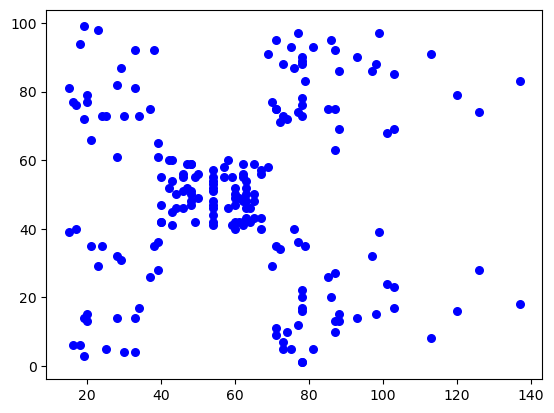

In [113]:
plt.scatter(x["A"], x["B"], s = 30, c = 'b')
plt.show()

In [135]:
Kmean = KMeans(n_clusters=5)
Kmean.fit(x)

centers= Kmean.cluster_centers_
print(Kmean.cluster_centers_)

[[86.53846154 82.12820513]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


In [137]:
clusters= Kmean.fit_predict(x)
ds["label"]= clusters
ds.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),A,B,label
0,1,Male,19,15,39,15,39,4
1,2,Male,21,15,81,15,81,3
2,3,Female,20,16,6,16,6,4
3,4,Female,23,16,77,16,77,3
4,5,Female,31,17,40,17,40,4
...,...,...,...,...,...,...,...,...
95,96,Male,24,60,52,60,52,1
96,97,Female,47,60,47,60,47,1
97,98,Female,27,60,50,60,50,1
98,99,Male,48,61,42,61,42,1


In [139]:
col= ['green', 'blue', 'black', 'yellow', 'orange',]

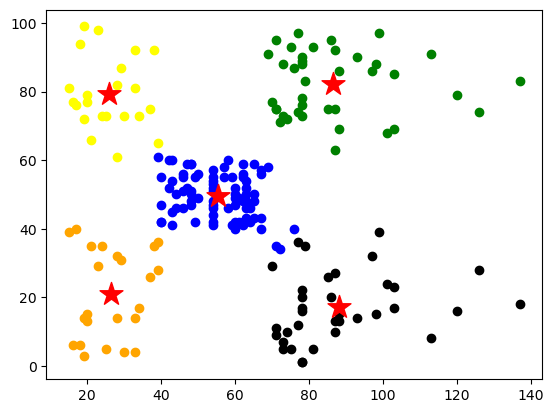

In [141]:
for i in range(5):
    a= col[i]
    plt.scatter(ds.A[ds.label==i], ds.B[ds.label==i], c=a, label='cluster 1')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300, c='r', label='centroid')

In [143]:
x1= x.loc[:,["A", "B"]].values

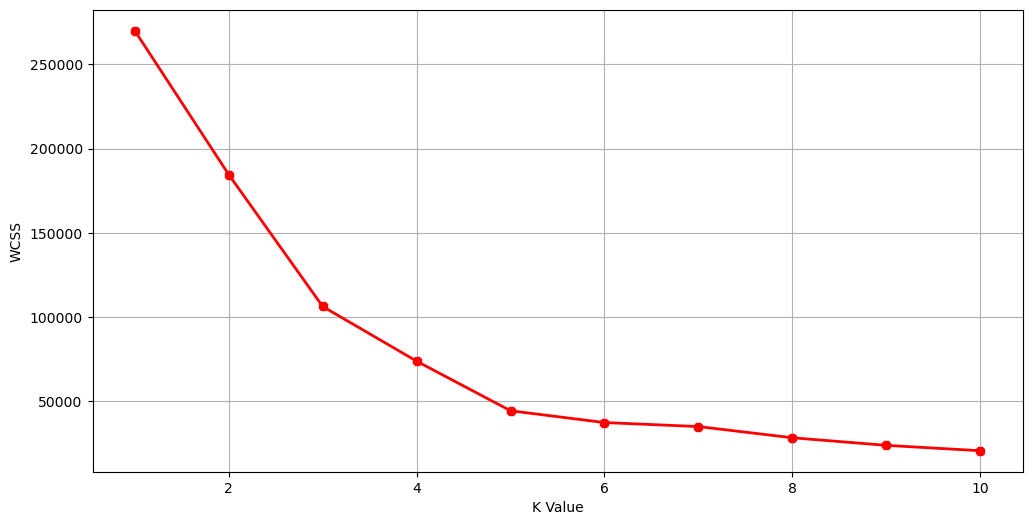

In [145]:
wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters= k, init= "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
# Visualize the clusters
plt.figure(figsize= (12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth= 2, color= "red", marker= "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()